# Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Read the dataset 

In [2]:
df = pd.read_csv("youTubeSearchListTamilNadu.csv",index_col=[0])

/home/shivshaurya/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (0,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags
0,DPgTI-qO_uc,True beauty #shors#Truebeauty#kdrama#LeeSuHo#H...,5,1,0,0,0,2021-10-06T18:31:40Z,NaN,PT40S,[]
1,07MEle9JSdo,penthouse #shorts#kdrama#koreandrama#edit#kdra...,7,1,0,0,0,2021-10-05T19:13:52Z,NaN,PT14S,[]
2,AIH02FlY-Qc,💔💔 #shorts#kdrama#koreandrama#edit#kdramaedit#...,6,1,0,0,0,2021-10-05T19:09:04Z,NaN,PT9S,[]
3,t9ISH4DtrM4,🔥🔥🔥 #shorts#kdramaedit#kdrama#itsoknottobeokay...,6,2,0,0,0,2021-09-21T18:47:25Z,NaN,PT11S,[]
4,Pr4BEqNMYBA,This scene 😯😍🔥 #shorts#kdrama#doomatyourservic...,1,1,0,0,0,2021-09-20T17:51:11Z,NaN,PT22S,[]


In [4]:
df.shape

(136349, 11)

# Check for null value count

In [5]:
df.isnull().sum()

ContentId            0
title                0
viewCount        31482
likeCount        31482
dislikeCount     31482
commentCount     31482
favoriteCount    31482
publishedAt      31482
description      34621
duration         31483
tags             31483
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136349 entries, 0 to 104866
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ContentId      136349 non-null  object
 1   title          136349 non-null  object
 2   viewCount      104867 non-null  object
 3   likeCount      104867 non-null  object
 4   dislikeCount   104867 non-null  object
 5   commentCount   104867 non-null  object
 6   favoriteCount  104867 non-null  object
 7   publishedAt    104867 non-null  object
 8   description    101728 non-null  object
 9   duration       104866 non-null  object
 10  tags           104866 non-null  object
dtypes: object(11)
memory usage: 12.5+ MB


# Converting Object dtype to strings

In [7]:
df['title'] = df['title'].convert_dtypes()
df['description'] = df['description'].convert_dtypes()
df['tags'] = df['tags'].convert_dtypes()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136349 entries, 0 to 104866
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ContentId      136349 non-null  object
 1   title          136349 non-null  string
 2   viewCount      104867 non-null  object
 3   likeCount      104867 non-null  object
 4   dislikeCount   104867 non-null  object
 5   commentCount   104867 non-null  object
 6   favoriteCount  104867 non-null  object
 7   publishedAt    104867 non-null  object
 8   description    101728 non-null  string
 9   duration       104866 non-null  object
 10  tags           104866 non-null  string
dtypes: object(8), string(3)
memory usage: 12.5+ MB


# Dropping Null Values

In [9]:
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101727 entries, 0 to 101726
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ContentId      101727 non-null  object
 1   title          101727 non-null  string
 2   viewCount      101727 non-null  object
 3   likeCount      101727 non-null  object
 4   dislikeCount   101727 non-null  object
 5   commentCount   101727 non-null  object
 6   favoriteCount  101727 non-null  object
 7   publishedAt    101727 non-null  object
 8   description    101727 non-null  string
 9   duration       101727 non-null  object
 10  tags           101727 non-null  string
dtypes: object(8), string(3)
memory usage: 8.5+ MB


In [11]:
df.isnull().sum()

ContentId        0
title            0
viewCount        0
likeCount        0
dislikeCount     0
commentCount     0
favoriteCount    0
publishedAt      0
description      0
duration         0
tags             0
dtype: int64

# Removing tags, special characters and digits, convert to lower case

In [12]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

df['text'] = df['title'] + df['description'] + df['tags']
df['text'] = df['text'].apply(lambda x:pre_process(x))

#show the second 'text' just for fun
df['text'][2]

'k drama savage girls part comment down your first k drama kdrama savagegirlsjkoreandrama howyoulikethatpart koreandrama kcdrama hello guys i made an edit of kdrama savgegirls i hope all of you like it if you it pleases like share comment and do subscribe to my channel and give your love to my channel thank you keep supporting here is the link of part https youtu be dlcfhts om '

In [13]:
df.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text
0,Q3ZfBWha5sk,Things I learn from k drama,4,2,0,0,0,2021-08-08T14:03:13Z,#kdrama#koreandrama#kcdrama#koreanwords#annyeo...,PT29S,[],things i learn from k drama kdrama koreandrama...
1,HeFfpcQfllk,Love alarm mv x Señorita shawn mendes korean m...,29,4,0,3,0,2021-07-02T22:35:24Z,#kdrama#ytvideo#lovealarms1mv#mv#lovealarm#lov...,PT25S,[],love alarm mv x señorita shawn mendes korean m...
2,gBcTNgWWCeY,K-drama savage girls part 2 (comment down your...,10,4,0,0,0,2021-06-26T22:49:16Z,#kdrama#savagegirlsjkoreandrama#howyoulikethat...,PT1M51S,[],k drama savage girls part comment down your fi...
3,cpwR1pgz2U0,The tale of the nine tailed part 1 eng sub,5,0,0,0,0,2021-06-17T14:36:28Z,#thetaleoftheninetailed#thetaleoftheninetailed...,PT22M20S,[],the tale of the nine tailed part eng sub theta...
4,PGKsQxDpf_E,The tale of the nine tailed episode 1,9,2,0,0,0,2021-06-15T12:43:48Z,#thetaleoftheninetailed#kdrama#k&cdrama#thetal...,PT1H5M34S,[],the tale of the nine tailed episode thetaleoft...


# Lemmatization and Removal of Stopwords

In [14]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
processed_all_documents = list()

for desc in df['text']:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)
df['Processed_text'] = processed_all_documents
df['Word_Count'] = [len(desc.split(' ')) for desc in df['Processed_text']]

wordCount_after = df['Word_Count'].sum()
print("Total Words after processing: ", wordCount_after)
print("Max word count of a Document: ", df['Word_Count'].max())
print("Mean word count of Documents: ", df['Word_Count'].mean())

[nltk_data] Downloading package punkt to
[nltk_data]     /home/shivshaurya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/shivshaurya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shivshaurya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total Words after processing:  19198824
Max word count of a Document:  1921
Mean word count of Documents:  188.7288920345631


In [15]:
df.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count
0,Q3ZfBWha5sk,Things I learn from k drama,4,2,0,0,0,2021-08-08T14:03:13Z,#kdrama#koreandrama#kcdrama#koreanwords#annyeo...,PT29S,[],things i learn from k drama kdrama koreandrama...,thing learn k drama kdrama koreandrama kcdrama...,28
1,HeFfpcQfllk,Love alarm mv x Señorita shawn mendes korean m...,29,4,0,3,0,2021-07-02T22:35:24Z,#kdrama#ytvideo#lovealarms1mv#mv#lovealarm#lov...,PT25S,[],love alarm mv x señorita shawn mendes korean m...,love alarm mv x señorita shawn mend korean mix...,42
2,gBcTNgWWCeY,K-drama savage girls part 2 (comment down your...,10,4,0,0,0,2021-06-26T22:49:16Z,#kdrama#savagegirlsjkoreandrama#howyoulikethat...,PT1M51S,[],k drama savage girls part comment down your fi...,k drama savage girl part comment first k drama...,40
3,cpwR1pgz2U0,The tale of the nine tailed part 1 eng sub,5,0,0,0,0,2021-06-17T14:36:28Z,#thetaleoftheninetailed#thetaleoftheninetailed...,PT22M20S,[],the tale of the nine tailed part eng sub theta...,tale nine tail part eng sub thetaleofthenineta...,48
4,PGKsQxDpf_E,The tale of the nine tailed episode 1,9,2,0,0,0,2021-06-15T12:43:48Z,#thetaleoftheninetailed#kdrama#k&cdrama#thetal...,PT1H5M34S,[],the tale of the nine tailed episode thetaleoft...,tale nine tail episode thetaleoftheninetailed ...,39


# Create a vocabulary of words, 
Ignore words that appear in 85% of documents, 
Eliminate stop words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import re

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words("resources/stopwords.txt")

#get the text column 
docs=df['Processed_text'].tolist()

#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

/home/shivshaurya/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['come', 'vis', 'viser', 'visest'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [17]:
word_count_vector.shape

(101727, 206077)

In [18]:
list(cv.vocabulary_.keys())[:10]

['learn',
 'drama',
 'kdrama',
 'koreandrama',
 'kcdrama',
 'koreanwords',
 'annyeong',
 'kdramagirls',
 'hello',
 'lover']

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [20]:
# you only needs to do this once, this is a mapping of index to 
feature_names=cv.get_feature_names()

In [21]:
feature_names

['__',
 '___',
 '____',
 '_____',
 '______',
 '_______',
 '________',
 '_________',
 '__________',
 '___________',
 '____________',
 '_____________',
 '______________',
 '_______________',
 '________________',
 '_________________',
 '__________________',
 '___________________',
 '____________________',
 '_____________________',
 '______________________',
 '_______________________',
 '________________________',
 '_________________________',
 '__________________________',
 '___________________________',
 '____________________________',
 '_____________________________',
 '______________________________',
 '_______________________________',
 '________________________________',
 '_________________________________',
 '__________________________________',
 '___________________________________',
 '____________________________________',
 '_____________________________________',
 '______________________________________',
 '_______________________________________',
 '_____________________________

# Generate tf-idf for the given document

In [22]:
i = 0
tex_list = df['Processed_text'].tolist()
tf_idf_vector_list = []
for i in range(len(tex_list)):
    tf_idf_vector=tfidf_transformer.transform(cv.transform([tex_list[i]]))
    i = i+1
    tf_idf_vector_list.append(tf_idf_vector)
    # added to list  
    if ((i%10000) == 0):
        print ('Collecting tf-idf',i)
print(len(tf_idf_vector_list))

101727


In [23]:
tf_idf_vector_list[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

# Label Generation for Supervised Learning
K-Means Clustering is done based on Processed text

In [24]:
#Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [25]:
document = df['Processed_text'].values.astype('U')
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(document)

In [26]:
k=20 #Obtained from Silhouette_score
model = KMeans(n_clusters=k,init='k-means++',max_iter=100,n_init=1)
label = model.fit(features)

# Calculation of optimal value of K

In [27]:
# from sklearn.metrics import silhouette_score

# sil = []
# kmax = 20
# sil
# # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
# for k in range(2, kmax+1):
#     kmeans = KMeans(n_clusters = k).fit(features)
#     labels = kmeans.labels_
#     sil.append(silhouette_score(features, labels, metric = 'euclidean'))
#     print("Done for k =",k)


In [28]:
df['cluster'] = model.labels_

In [29]:
print(model.labels_)

[3 3 3 ... 3 3 3]


In [30]:
df.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster
0,Q3ZfBWha5sk,Things I learn from k drama,4,2,0,0,0,2021-08-08T14:03:13Z,#kdrama#koreandrama#kcdrama#koreanwords#annyeo...,PT29S,[],things i learn from k drama kdrama koreandrama...,thing learn k drama kdrama koreandrama kcdrama...,28,3
1,HeFfpcQfllk,Love alarm mv x Señorita shawn mendes korean m...,29,4,0,3,0,2021-07-02T22:35:24Z,#kdrama#ytvideo#lovealarms1mv#mv#lovealarm#lov...,PT25S,[],love alarm mv x señorita shawn mendes korean m...,love alarm mv x señorita shawn mend korean mix...,42,3
2,gBcTNgWWCeY,K-drama savage girls part 2 (comment down your...,10,4,0,0,0,2021-06-26T22:49:16Z,#kdrama#savagegirlsjkoreandrama#howyoulikethat...,PT1M51S,[],k drama savage girls part comment down your fi...,k drama savage girl part comment first k drama...,40,3
3,cpwR1pgz2U0,The tale of the nine tailed part 1 eng sub,5,0,0,0,0,2021-06-17T14:36:28Z,#thetaleoftheninetailed#thetaleoftheninetailed...,PT22M20S,[],the tale of the nine tailed part eng sub theta...,tale nine tail part eng sub thetaleofthenineta...,48,3
4,PGKsQxDpf_E,The tale of the nine tailed episode 1,9,2,0,0,0,2021-06-15T12:43:48Z,#thetaleoftheninetailed#kdrama#k&cdrama#thetal...,PT1H5M34S,[],the tale of the nine tailed episode thetaleoft...,tale nine tail episode thetaleoftheninetailed ...,39,3


# Checking number of items in each cluster

In [31]:
i = 0
cluster_dict = {}
for i in range(len(df['cluster'].unique())):
    count = (df.cluster == i).sum()
    print(f"Total count of cluster {i} is {count}")
    cluster_dict[f'C{i}'] = count
print(cluster_dict)

Total count of cluster 0 is 595
Total count of cluster 1 is 364
Total count of cluster 2 is 2215
Total count of cluster 3 is 33701
Total count of cluster 4 is 797
Total count of cluster 5 is 17886
Total count of cluster 6 is 19322
Total count of cluster 7 is 1302
Total count of cluster 8 is 4213
Total count of cluster 9 is 2599
Total count of cluster 10 is 1921
Total count of cluster 11 is 2169
Total count of cluster 12 is 734
Total count of cluster 13 is 953
Total count of cluster 14 is 543
Total count of cluster 15 is 2118
Total count of cluster 16 is 4323
Total count of cluster 17 is 1951
Total count of cluster 18 is 2931
Total count of cluster 19 is 1090
{'C0': 595, 'C1': 364, 'C2': 2215, 'C3': 33701, 'C4': 797, 'C5': 17886, 'C6': 19322, 'C7': 1302, 'C8': 4213, 'C9': 2599, 'C10': 1921, 'C11': 2169, 'C12': 734, 'C13': 953, 'C14': 543, 'C15': 2118, 'C16': 4323, 'C17': 1951, 'C18': 2931, 'C19': 1090}


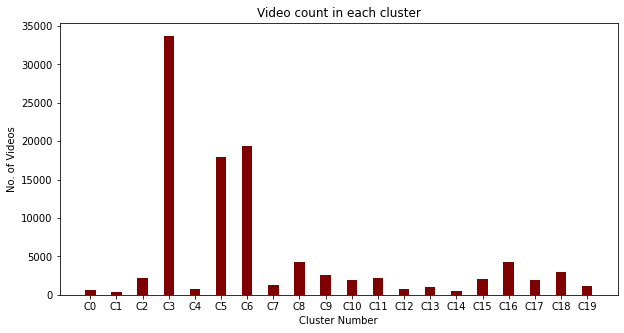

In [32]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
cluster = list(cluster_dict.keys())
count_video = list(cluster_dict.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(cluster, count_video, color ='maroon',width = 0.4)

plt.xlabel("Cluster Number")
plt.ylabel("No. of Videos")
plt.title("Video count in each cluster")
plt.show()


In [33]:
def Average(lst):
    return sum(lst) / len(lst)
mean = Average(count_video)
int(mean * 2)

10172

In [49]:
count = (df.cluster == 0).sum()
print(count)
thres = int(2 * mean)
columns = list(df.columns)
#columns

595


In [50]:
df_new = pd.DataFrame(columns=columns)
for i in range(len(df['cluster'].unique())):
    count = (df.cluster == i).sum()
    print(count)
    thres = int(2 * mean)
    if count > thres:
        temp_df = df.loc[df['cluster'] == i]
        temp_df = temp_df.iloc[:thres]
        df_new = pd.concat([df_new, temp_df], ignore_index=True)
    else:
        temp_df = df.loc[df['cluster'] == i]
        df_new = pd.concat([df_new, temp_df], ignore_index=True)

595
364
2215
33701
797
17886
19322
1302
4213
2599
1921
2169
734
953
543
2118
4323
1951
2931
1090


In [51]:
df_new.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster
0,o28iwR1XQaw,देवर जी जल्दी करके निकल जाओ नहीं तो आपकी पत्नी...,2835,19,9,5,0.0,2021-10-11T15:08:36Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M19S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,53,0
1,eQBVpfwTt1U,रास्ते में राहगीर साधु को ही पटाकर पीछे से काम...,6877,46,9,7,0.0,2021-10-06T15:30:45Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M2S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,56,0
2,jB574yBRlr8,वीडीयो देखकर आपके होश उड़ जाएंगे इस वीडियो को ...,6989,31,11,13,0.0,2021-10-03T15:09:33Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M24S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,57,0
3,Idwcd_EbYKY,पड़ोसी देवर ने भाभी को पीछे से माजा मार लिया #...,8521,45,11,12,0.0,2021-09-29T15:09:07Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M43S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,52,0
4,d6GL7dVOMfk,बधारी में गांव के लड़के से मना लिया सुहागरात #...,158729,329,99,22,0.0,2021-09-28T14:55:08Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M51S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,51,0


In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61334 entries, 0 to 61333
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ContentId       61334 non-null  object
 1   title           61334 non-null  string
 2   viewCount       61334 non-null  object
 3   likeCount       61334 non-null  object
 4   dislikeCount    61334 non-null  object
 5   commentCount    61334 non-null  object
 6   favoriteCount   61334 non-null  object
 7   publishedAt     61334 non-null  object
 8   description     61334 non-null  string
 9   duration        61334 non-null  object
 10  tags            61334 non-null  string
 11  text            61334 non-null  object
 12  Processed_text  61334 non-null  object
 13  Word_Count      61334 non-null  object
 14  cluster         61334 non-null  object
dtypes: object(12), string(3)
memory usage: 7.0+ MB


In [53]:
df_new['cluster'] = df_new['cluster'].astype(float).astype('int32')
df_new['Word_Count'] = df_new['Word_Count'].astype(float).astype('int64')

In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61334 entries, 0 to 61333
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ContentId       61334 non-null  object
 1   title           61334 non-null  string
 2   viewCount       61334 non-null  object
 3   likeCount       61334 non-null  object
 4   dislikeCount    61334 non-null  object
 5   commentCount    61334 non-null  object
 6   favoriteCount   61334 non-null  object
 7   publishedAt     61334 non-null  object
 8   description     61334 non-null  string
 9   duration        61334 non-null  object
 10  tags            61334 non-null  string
 11  text            61334 non-null  object
 12  Processed_text  61334 non-null  object
 13  Word_Count      61334 non-null  int64 
 14  cluster         61334 non-null  int32 
dtypes: int32(1), int64(1), object(10), string(3)
memory usage: 6.8+ MB


In [55]:
df_new.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster
0,o28iwR1XQaw,देवर जी जल्दी करके निकल जाओ नहीं तो आपकी पत्नी...,2835,19,9,5,0.0,2021-10-11T15:08:36Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M19S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,53,0
1,eQBVpfwTt1U,रास्ते में राहगीर साधु को ही पटाकर पीछे से काम...,6877,46,9,7,0.0,2021-10-06T15:30:45Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M2S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,56,0
2,jB574yBRlr8,वीडीयो देखकर आपके होश उड़ जाएंगे इस वीडियो को ...,6989,31,11,13,0.0,2021-10-03T15:09:33Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M24S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,57,0
3,Idwcd_EbYKY,पड़ोसी देवर ने भाभी को पीछे से माजा मार लिया #...,8521,45,11,12,0.0,2021-09-29T15:09:07Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M43S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,52,0
4,d6GL7dVOMfk,बधारी में गांव के लड़के से मना लिया सुहागरात #...,158729,329,99,22,0.0,2021-09-28T14:55:08Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M51S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,51,0


In [56]:
df_new['cluster'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [57]:
i = 0
cluster_dict = {}
for i in range(len(df_new['cluster'].unique())):
    count = (df_new.cluster == i).sum()
    print(f"Total count of cluster {i} is {count}")
    cluster_dict[f'C{i}'] = count
print(cluster_dict)

Total count of cluster 0 is 595
Total count of cluster 1 is 364
Total count of cluster 2 is 2215
Total count of cluster 3 is 10172
Total count of cluster 4 is 797
Total count of cluster 5 is 10172
Total count of cluster 6 is 10172
Total count of cluster 7 is 1302
Total count of cluster 8 is 4213
Total count of cluster 9 is 2599
Total count of cluster 10 is 1921
Total count of cluster 11 is 2169
Total count of cluster 12 is 734
Total count of cluster 13 is 953
Total count of cluster 14 is 543
Total count of cluster 15 is 2118
Total count of cluster 16 is 4323
Total count of cluster 17 is 1951
Total count of cluster 18 is 2931
Total count of cluster 19 is 1090
{'C0': 595, 'C1': 364, 'C2': 2215, 'C3': 10172, 'C4': 797, 'C5': 10172, 'C6': 10172, 'C7': 1302, 'C8': 4213, 'C9': 2599, 'C10': 1921, 'C11': 2169, 'C12': 734, 'C13': 953, 'C14': 543, 'C15': 2118, 'C16': 4323, 'C17': 1951, 'C18': 2931, 'C19': 1090}


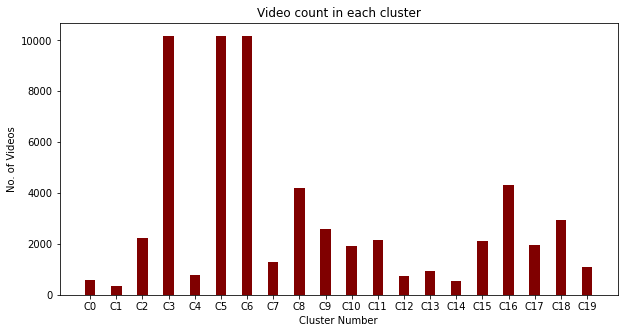

In [58]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
cluster = list(cluster_dict.keys())
count_video = list(cluster_dict.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(cluster, count_video, color ='maroon',width = 0.4)

plt.xlabel("Cluster Number")
plt.ylabel("No. of Videos")
plt.title("Video count in each cluster")
plt.show()

In [59]:
df_new.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster
0,o28iwR1XQaw,देवर जी जल्दी करके निकल जाओ नहीं तो आपकी पत्नी...,2835,19,9,5,0.0,2021-10-11T15:08:36Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M19S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,53,0
1,eQBVpfwTt1U,रास्ते में राहगीर साधु को ही पटाकर पीछे से काम...,6877,46,9,7,0.0,2021-10-06T15:30:45Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M2S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,56,0
2,jB574yBRlr8,वीडीयो देखकर आपके होश उड़ जाएंगे इस वीडियो को ...,6989,31,11,13,0.0,2021-10-03T15:09:33Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M24S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,57,0
3,Idwcd_EbYKY,पड़ोसी देवर ने भाभी को पीछे से माजा मार लिया #...,8521,45,11,12,0.0,2021-09-29T15:09:07Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M43S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,52,0
4,d6GL7dVOMfk,बधारी में गांव के लड़के से मना लिया सुहागरात #...,158729,329,99,22,0.0,2021-09-28T14:55:08Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M51S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,51,0


# Sort the tf-idf vectors by descending order of scores

In [60]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [61]:
i = 0
tex_list = df_new['Processed_text'].tolist()
tf_idf_vector_list = []
for i in range(len(tex_list)):
    tf_idf_vector=tfidf_transformer.transform(cv.transform([tex_list[i]]))
    i = i+1
    tf_idf_vector_list.append(tf_idf_vector)
    # added to list  
    if ((i%10000) == 0):
        print ('Collecting tf-idf',i)
print(len(tf_idf_vector_list))

61334


In [62]:
tf_idf_vector_list[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [63]:
sorted_items_list=[]
i=0
for i in range(len(tf_idf_vector_list)):
    sorted_items=sort_coo(tf_idf_vector_list[i].tocoo())
    i = i+1
    sorted_items_list.append(sorted_items)
    # added to list  
    if ((i%10000) == 0):
        print ('Sorting Done for',i)

Sorting Done for 10000
Sorting Done for 20000
Sorting Done for 30000
Sorting Done for 40000
Sorting Done for 50000
Sorting Done for 60000


In [64]:
len(sorted_items_list)

61334

# Extract only the top n; n here is 5

In [65]:
def extract_topn_from_vector(feature_names, sorted_items, topn=5):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [66]:
keyword_list = []
i=0
for i in range(len(sorted_items_list)):
    keywords=extract_topn_from_vector(feature_names,sorted_items_list[i],5)
    i = i+1
    keyword_list.append(keywords)
    # added to list  
    if ((i%10000) == 0):
        print ('Keywords added for',i)

Keywords added for 10000
Keywords added for 20000
Keywords added for 30000
Keywords added for 40000
Keywords added for 50000
Keywords added for 60000


In [67]:
len(keyword_list)

61334

In [68]:
def getList(dict):
    return list(dict.keys())
key_list = []
i = 0
for i in range(len(keyword_list)):
    keys = getList(keyword_list[i])
    key_list.append(keys)
    
len(key_list)
    

61334

In [69]:
key_list[0]

['masti', 'csk', 'comdy', 'rajbhar', 'bhojuperi']

In [70]:
df_new['keywords'] = key_list

In [71]:
df_new.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster,keywords
0,o28iwR1XQaw,देवर जी जल्दी करके निकल जाओ नहीं तो आपकी पत्नी...,2835,19,9,5,0.0,2021-10-11T15:08:36Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M19S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,53,0,"[masti, csk, comdy, rajbhar, bhojuperi]"
1,eQBVpfwTt1U,रास्ते में राहगीर साधु को ही पटाकर पीछे से काम...,6877,46,9,7,0.0,2021-10-06T15:30:45Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M2S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,56,0,"[masti, csk, comdy, हग, पट]"
2,jB574yBRlr8,वीडीयो देखकर आपके होश उड़ जाएंगे इस वीडियो को ...,6989,31,11,13,0.0,2021-10-03T15:09:33Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M24S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,57,0,"[masti, csk, comdy, rajbhar, bhojuperi]"
3,Idwcd_EbYKY,पड़ोसी देवर ने भाभी को पीछे से माजा मार लिया #...,8521,45,11,12,0.0,2021-09-29T15:09:07Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M43S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,52,0,"[masti, csk, comdy, rajbhar, bhojuperi]"
4,d6GL7dVOMfk,बधारी में गांव के लड़के से मना लिया सुहागरात #...,158729,329,99,22,0.0,2021-09-28T14:55:08Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M51S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,51,0,"[masti, csk, comdy, बध, rajbhar]"


In [72]:
count_list = []
key_words=''
keyword_list = df_new['keywords']
combine_keyword = [[' '.join(i)] for i in keyword_list]
df_new['combine_keywords'] = combine_keyword

In [73]:
df_new.tail()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster,keywords,combine_keywords
61329,itd0Nd5AYN8,How to Present Prawn Cocktail | Gordon Ramsay,209991,2625,104,4,0,2009-11-04T10:03:37Z,Gordon Ramsay shows Kirstie Allsopp how to pre...,PT2M14S,"['Gordon Ramsay', 'Gordon Ramsay recipe', 'Gor...",how to present prawn cocktail gordon ramsaygor...,present prawn cocktail gordon ramsaygordon ram...,129,19,"[gordon, ramsay, prawn, cook, cocktail]",[gordon ramsay prawn cook cocktail]
61330,qSHXG-5ShFk,How to Make Mayonnaise | Gordon Ramsay,8456642,86466,2597,683,0,2009-11-04T10:02:17Z,Gordon Ramsay shows how to make mayonnaise. Hi...,PT1M45S,"['Gordon Ramsay', 'Gordon Ramsay recipe', 'Gor...",how to make mayonnaise gordon ramsaygordon ram...,make mayonnaise gordon ramsaygordon ramsay sho...,107,19,"[gordon, ramsay, mayonnaise, recipe, cook]",[gordon ramsay mayonnaise recipe cook]
61331,-tZaY-bl5aM,Chris Moyles Strips While Louis Walsh and Kell...,20954,304,15,1,0,2009-11-04T10:00:27Z,Chris Moyles is cooking along live with Gordon...,PT1M4S,"['Gordon Ramsay', 'Gordon Ramsay recipe', 'Gor...",chris moyles strips while louis walsh and kell...,chris moyles strip louis walsh kelly jones wat...,120,19,"[gordon, ramsay, cook, walsh, gordonramsay]",[gordon ramsay cook walsh gordonramsay]
61332,j9aaBv5se68,Andi Peters is Better Than Chef | Gordon Ramsay,99588,740,6,10,0,2009-11-04T09:59:57Z,Andy Peters beats Gordon Ramsay in the chocola...,PT55S,"['Gordon Ramsay', 'Gordon Ramsay recipe', 'Gor...",andi peters is better than chef gordon ramsaya...,andi peter good chef gordon ramsayandy peter b...,114,19,"[gordon, ramsay, andi, cook, peter]",[gordon ramsay andi cook peter]
61333,UBJtUcnn2RI,Minted Pea and Watercress Veloute | Gordon Ramsay,200496,1708,60,17,0,2009-11-04T09:59:22Z,Gordon Ramsay's recipe for Minted Pea and Wate...,PT32S,"['Gordon Ramsay', 'Gordon Ramsay recipe', 'Gor...",minted pea and watercress veloute gordon ramsa...,mint pea watercress veloute gordon ramsaygordo...,103,19,"[gordon, ramsay, cook, watercress, gordonramsay]",[gordon ramsay cook watercress gordonramsay]


In [74]:
data = df_new['combine_keywords']
result = []
for sublist in data:
    for item in sublist:
        result.append(item)

df_new['combine_keywords'] = result
df_new.head()

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster,keywords,combine_keywords
0,o28iwR1XQaw,देवर जी जल्दी करके निकल जाओ नहीं तो आपकी पत्नी...,2835,19,9,5,0.0,2021-10-11T15:08:36Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M19S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,द वर ज जल द करक न कल ज ओ नह त आपक पत न आ ज एग ...,53,0,"[masti, csk, comdy, rajbhar, bhojuperi]",masti csk comdy rajbhar bhojuperi
1,eQBVpfwTt1U,रास्ते में राहगीर साधु को ही पटाकर पीछे से काम...,6877,46,9,7,0.0,2021-10-06T15:30:45Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M2S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,र स त म र हग र स ध क ह पट कर प छ स क म चल न लग...,56,0,"[masti, csk, comdy, हग, पट]",masti csk comdy हग पट
2,jB574yBRlr8,वीडीयो देखकर आपके होश उड़ जाएंगे इस वीडियो को ...,6989,31,11,13,0.0,2021-10-03T15:09:33Z,#csk masti Hindi bhojpuri entertainment comed...,PT7M24S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,व ड य द खकर आपक ह श उड ज ए ग इस व ड य क अक ल म...,57,0,"[masti, csk, comdy, rajbhar, bhojuperi]",masti csk comdy rajbhar bhojuperi
3,Idwcd_EbYKY,पड़ोसी देवर ने भाभी को पीछे से माजा मार लिया #...,8521,45,11,12,0.0,2021-09-29T15:09:07Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M43S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,पड स द वर न भ भ क प छ स म ज म र ल य csk masti ...,52,0,"[masti, csk, comdy, rajbhar, bhojuperi]",masti csk comdy rajbhar bhojuperi
4,d6GL7dVOMfk,बधारी में गांव के लड़के से मना लिया सुहागरात #...,158729,329,99,22,0.0,2021-09-28T14:55:08Z,#csk masti Hindi bhojpuri entertainment comed...,PT11M51S,"['csk masti', 'entertenmaintvideo', 'Hind comd...",बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,बध र म ग व क लड क स मन ल य स ह गर त csk masti ...,51,0,"[masti, csk, comdy, बध, rajbhar]",masti csk comdy बध rajbhar


In [75]:
df_new.to_csv('Final.csv')

In [76]:
df_new.isnull().sum()

ContentId           0
title               0
viewCount           0
likeCount           0
dislikeCount        0
commentCount        0
favoriteCount       0
publishedAt         0
description         0
duration            0
tags                0
text                0
Processed_text      0
Word_Count          0
cluster             0
keywords            0
combine_keywords    0
dtype: int64

# Input Data

In [77]:
import numpy as np
input_data = np.array(df_new['combine_keywords'])
input_data = input_data.flatten()

In [78]:
input_data.shape

(61334,)

# Output Data

In [79]:
output_data = df_new['cluster']

In [80]:
output_data.shape

(61334,)

# Train test split

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (input_data,output_data,test_size=0.20,random_state=0)
y_train.shape

(49067,)

# Text to numerical conversion

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_data=vectorizer.fit_transform(x_train)
test_data=vectorizer.transform(x_test)
train_data

<49067x28875 sparse matrix of type '<class 'numpy.float64'>'
	with 245235 stored elements in Compressed Sparse Row format>

In [83]:
train_data.shape

(49067, 28875)

In [84]:
# from sklearn.decomposition import TruncatedSVD
# def svd_tfidf_matrix(matrix):
#     svd = TruncatedSVD(n_components=3)
#     return svd.fit_transform(matrix)

In [85]:
# train_data = svd_tfidf_matrix(matrix=train_data)

In [86]:
# test_data = svd_tfidf_matrix(matrix=test_data)

In [87]:
train_data.shape

(49067, 28875)

In [88]:
test_data.shape

(12267, 28875)

In [89]:
type(y_train)

pandas.core.series.Series

In [90]:
type(train_data)

scipy.sparse.csr.csr_matrix

# DecisionTreeClassifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(max_depth=20,random_state=0)
model3.fit(train_data, y_train)
print(model3.score(train_data, y_train))
print(model3.score(test_data,y_test))

0.6896080869015836
0.6890030162223852


In [92]:
#Predict the response for test dataset
y_pred = model3.predict(test_data)

In [93]:
# save the model to disk
import pickle
filename = 'decisionTree.pkl'
pickle.dump(model3, open(filename, 'wb'))

In [94]:
print(test_data[0])

  (0, 3718)	0.37798710144990433
  (0, 6263)	0.5249131892043349
  (0, 14919)	0.3546445366038528
  (0, 27800)	0.48744778355794244
  (0, 28316)	0.4671336060468373


In [95]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6890030162223852


In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.56      0.71       117
           1       1.00      1.00      1.00        82
           2       1.00      0.93      0.96       435
           3       0.96      0.09      0.16      2021
           4       1.00      1.00      1.00       131
           5       1.00      1.00      1.00      1982
           6       0.35      1.00      0.52      2053
           7       0.98      0.99      0.98       264
           8       0.98      0.48      0.64       821
           9       0.96      0.98      0.97       549
          10       1.00      0.98      0.99       378
          11       1.00      0.81      0.90       471
          12       1.00      1.00      1.00       158
          13       0.98      0.92      0.95       196
          14       0.95      1.00      0.97       114
          15       0.62      0.01      0.02       430
          16       0.96      0.48      0.64       830
          17       1.00    

In [98]:
 print(confusion_matrix(y_test, y_pred))

[[  65    0    0    0    0    0   52    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0   82    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0  405    0    0    0   29    0    0    0    0    0    0    0
     0    1    0    0    0    0]
 [   1    0    0  174    0    0 1809    2    4   11    0    0    0    3
     4    0   13    0    0    0]
 [   0    0    0    0  131    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 1982    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0 2051    2    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    1    0    0    2  261    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0  425    0  393    2    0    0    0    0
     0    0    0    0    1    0]
 [   0    0    0    1    0    0    9    0    0  538    

In [111]:
keyword = "comedy videos"

In [112]:
#vect_out=cv.fit_transform(keyword)
#tfidf_transformer.fit(vect_out)
keyword_data=np.array(keyword)
keyword_data = keyword_data.flatten()
keyword_vect=vectorizer.transform(keyword_data)
keyword_vect

<1x28875 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [113]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(keyword_vect)
print(result)

[6]


In [114]:
result = loaded_model.predict(keyword_vect)
print(result)

[6]


In [115]:
result_cluster = df.loc[df['cluster'] == result[0]]
result_cluster

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster
4995,d9NsogHv768,School Students Explain What is N Corona Virus...,127,16,1,0,0,2020-01-31T13:17:08Z,#Corona #Covid19 #CoronaVirus #Lockdown ⬇️Su...,PT4M21S,"['chandigarh news', 'what is coronavirus', 'co...",school students explain what is n corona virus...,school student explain n corona virus prevent ...,124,6
5710,sysNV2mULnw,जर्मनी जाने के आसान तरीके Work Permit Visa Ge...,9151,150,11,17,0,2017-05-04T09:23:00Z,#GermanImmigration #GermanyWorkPermit #Immigra...,PT9M57S,"['german visa', 'germany visa', 'student visa'...",जर मन ज न क आस न तर क work permit visa germany...,जर मन ज न क आस न तर क work permit visa germany...,145,6
14004,uc0F_rQ8WUY,Mazdooro ka Dard.. | Part-1| Dhiraj | Harish |...,415,89,1,36,0,2020-06-16T19:27:09Z,"Hello everyone,welcome back hope you guys enjo...",PT6M55S,"['#\nmazdoor', '#mazdoor', '#mazdoorcryin', '#...",mazdooro ka dard part dhiraj harish xgh hello ...,mazdooro ka dard part dhiraj harish xgh hello ...,634,6
16472,1wfZ2mRn1qc,How did COVID change tourism? | COVID-19 Special,1569,44,7,12,0,2021-10-14T12:37:51Z,The pandemic was a respite for overrun cities ...,PT11M13S,"['DW News', 'COVID-19', 'Coronavirus', 'Touris...",how did covid change tourism covid specialthe ...,covid change tourism covid specialthe pandemic...,96,6
16473,yIFOnrB0kk0,Poland plans to build a 350-million Euro wall ...,9851,268,70,371,0,2021-10-14T11:07:22Z,Warsaw has drafted a bill to spend over 350-mi...,PT8M19S,"['DW News', 'EU borders', 'Poland Belarus bord...",poland plans to build a million euro wall at b...,poland plan build million euro wall belarus bo...,115,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78875,GCsX-Js6BFo,Minimilton pro player #youtubeindia #mayojapan...,4,0,1,0,0.0,2020-08-09T17:39:45Z,हिंदी में खोजें डोनाल्ड ट्रम्प Donald Trump ...,PT4M31S,[],minimilton pro player youtubeindia mayojapan a...,minimilton pro player youtubeindia mayojapan a...,465,6
81953,hRgMVqTRLQ0,How to Fix Pen Drive memory loss,275,1,0,1,0.0,2018-07-29T15:31:37Z,Easy fix to pen/ thumb drive memory loss. If p...,PT2M40S,"['Pen drive fix', 'memory loss fix', 'pen driv...",how to fix pen drive memory losseasy fix to pe...,fix pen drive memory losseasy fix pen thumb dr...,44,6
83097,8znP2U3va3c,#COVID-19#NMC#CORONA | DEAD BODY EXCHANGE | दो...,183,12,0,0,0.0,2020-09-08T05:27:43Z,नागपूर महापालिकेचा भोंगळ कारभार! मृतदेहांची अद...,PT2M27S,"['Coronavirus', 'Nagpur', 'coronavirus in nagp...",covid nmc corona dead body exchange द ष क ण श...,covid nmc corona dead body exchange द ष क ण श ...,395,6
87243,S4EdjSTDqsg,#coronavirus #Covid19 Coronavirus symptoms and...,21,10,0,0,0.0,2020-04-07T13:23:39Z,#coronavirus #Covid19 Coronavirus symptoms and...,PT1M42S,"['Corona virus news', 'symptoms of coronavirus...",coronavirus covid coronavirus symptoms and pr...,coronavirus covid coronavirus symptom precauti...,26,6


In [116]:
result_cluster['viewCount'] = pd.to_numeric(df['viewCount'],errors='coerce')

<ipython-input-116-c4fa36583f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster['viewCount'] = pd.to_numeric(df['viewCount'],errors='coerce')


In [117]:
result_cluster['viewCount'] = result_cluster['viewCount'].fillna(0)

<ipython-input-117-a71555df4c4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster['viewCount'] = result_cluster['viewCount'].fillna(0)


In [118]:
result_cluster['viewCount'] = result_cluster['viewCount'].astype('int32')

<ipython-input-118-2fa0e82fe5af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster['viewCount'] = result_cluster['viewCount'].astype('int32')


In [119]:
result_cluster['viewCount'].dtype

dtype('int32')

In [120]:
#Ten largest values in view Count column
recommended_data = result_cluster.nlargest(10,['viewCount'])
recommended_data

,ContentId,title,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,description,duration,tags,text,Processed_text,Word_Count,cluster
26841,-SgqGEX_DOw,#gettingsome: Disabled and sexually active | L...,12212930,69613,5994,2083,0,2015-10-30T09:55:35Z,This woman and her fiance need help to move bu...,PT12M37S,"['sex', '#gettingsome', 'disabled people', 'Li...",gettingsome disabled and sexually active life...,gettingsome disable sexually active life links...,33,6
19033,PLOwKTY81y4,Massive explosion in Beirut | DW News,9172417,57889,3987,12301,0,2020-08-04T16:34:51Z,Breaking news from Lebanon: The capital Beirut...,PT4M18S,"['beirut explosion', 'beirut', 'lebanon', 'exp...",massive explosion in beirut dw newsbreaking ne...,massive explosion beirut dw newsbreaking news ...,102,6
21474,T0NINJOuaf4,The German sauna culture – nudity and all | Me...,8789237,13941,3686,1552,0,2018-12-05T08:40:02Z,The Germans might not have invented the sauna ...,PT2M53S,"['Germany', 'German', 'culture shock', 'German...",the german sauna culture nudity and all meet t...,german sauna culture nudity meet germansthe ge...,141,6
28276,3inhQffPlAI,"Jerusalem: Three religions, three families | F...",7611990,48599,4807,1995,0,2015-03-01T15:01:05Z,The Old City of Jerusalem covers less than one...,PT26M7S,"['Jerusalem', 'Jews', 'Christians', 'Muslims',...",jerusalem three religions three families faith...,jerusalem three religion three family faith ma...,61,6
30643,nl3XZkQts3Q,The booming meat industry - Germany the world'...,7088504,8852,5715,2135,0,2014-02-26T14:09:07Z,The Tönnies factory reflects the boom in busin...,PT5M38S,"['Tönnies', 'pork', 'cheap meat', 'export', 'm...",the booming meat industry germany the world s ...,boom meat industry germany world second big po...,67,6
18824,VkuNWDG3yNM,Taiwan: China's next target? | DW Analysis,6030985,58362,7805,24309,0,2020-09-18T16:09:03Z,Despite China’s increasingly aggressive behavi...,PT56M19S,"['taiwan', 'china', 'china taiwan', 'taiwan ch...",taiwan china s next target dw analysisdespite ...,taiwan china next target dw analysisdespite ch...,385,6
28557,yz-Y7o7EETc,TV reporter live on air during Paris explosion...,5836070,65628,2366,768,0,2015-01-09T17:04:45Z,Police storm kosher supermarket in Paris while...,PT1M39S,"['Paris', 'Georg Matthes', 'siege', 'hostage',...",tv reporter live on air during paris explosion...,tv reporter live air paris explosion journalpo...,32,6
19636,yDWJtSsTnNM,Coronavirus Update: Italy reports record death...,5636021,25518,2256,5566,0,2020-03-19T10:04:31Z,Italy has reported the highest one-day death t...,PT21M52S,"['coronavirus', 'corona virus', 'virus outbrea...",coronavirus update italy reports record death ...,coronavirus update italy report record death t...,258,6
19031,wqKn_3iJOP4,Beirut explosion - Multi-angle footage | DW News,4590561,29276,2948,7548,0,2020-08-04T18:03:14Z,Breaking news from Lebanon: The capital Beirut...,PT23S,"['beirut explosion', 'beirut', 'lebanon', 'exp...",beirut explosion multi angle footage dw newsbr...,beirut explosion multi angle footage dw newsbr...,107,6
19620,H_JjhDvePV8,Coronavirus update: Italy struggles to combat ...,3274240,20305,1141,5326,0,2020-03-22T14:00:58Z,"Italy is struggling most to combat Covid-19, w...",PT9M47S,"['DW News', 'coronavirus', 'corona virus', 'vi...",coronavirus update italy struggles to combat t...,coronavirus update italy struggle combat tsuna...,187,6


In [121]:
recommendation_videos = recommended_data[['ContentId','title']]
recommendation_videos

,ContentId,title
26841,-SgqGEX_DOw,#gettingsome: Disabled and sexually active | L...
19033,PLOwKTY81y4,Massive explosion in Beirut | DW News
21474,T0NINJOuaf4,The German sauna culture – nudity and all | Me...
28276,3inhQffPlAI,"Jerusalem: Three religions, three families | F..."
30643,nl3XZkQts3Q,The booming meat industry - Germany the world'...
18824,VkuNWDG3yNM,Taiwan: China's next target? | DW Analysis
28557,yz-Y7o7EETc,TV reporter live on air during Paris explosion...
19636,yDWJtSsTnNM,Coronavirus Update: Italy reports record death...
19031,wqKn_3iJOP4,Beirut explosion - Multi-angle footage | DW News
19620,H_JjhDvePV8,Coronavirus update: Italy struggles to combat ...
